In [1]:
import Pkg

In [2]:
using Plots,Random,CurveFit

In [3]:
n=100 # length of read
l=1e7/n # no. of reads
l=Int64(l) # length of genome: 1e7
x=rand(1:1e7,l);  # Using random the starting positions of reads of length 100 are simulated and stored in an array

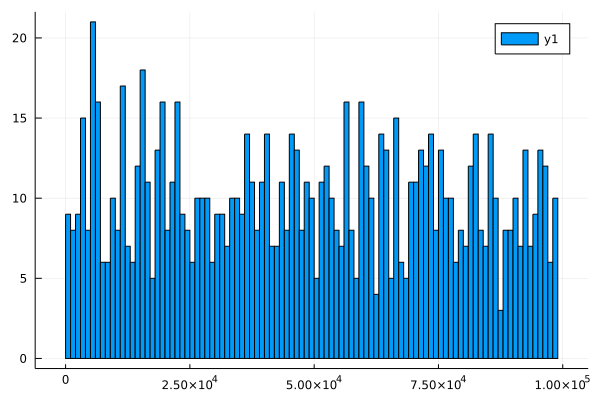

In [4]:
histogram(x,bins=1:1000:1e5)

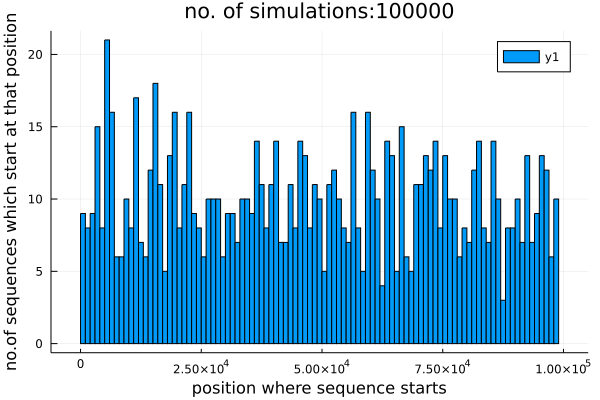

In [5]:
histogram(x,bins=1:1000:1e5)
xlabel!("position where sequence starts")
ylabel!("no.of sequences which start at that position")
title!("no. of simulations:"*string(l))

### The algorithm for previous plots seems to be difficult for two coverages and above , so in the next algorithm we simulate the starting position of a read and add 1.0 to next 100 positions as well. so the final array which we obtain we will have no. of coverages above a particular location. The array will look like  [1, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1] , by visual inspection for coverage 1 we have 2 regions of length 1 and 2. For coverage 2 the lengths will be 1 and 4. For coverage 3 the lengths will be 3 alone. The below code just finds the length of these regions and plots are plotted.

In [4]:
l=Int32(1e7)
n=100
s=Int32(4*l/n)
a=zeros(Int32,l)
for i in 1:s
    j=rand(1:l-100)
    a[j]+=1
    a[j+100] -= 1
end
# integrating the derivative array
for pos in 2:l
  a[pos]=a[pos]+a[pos-1]
end

In [ ]:
plot(1:length(a),rand(length(a),1))

In [ ]:
plot(1:length(a),a)
title!("array of steps")
xlabel!("various positions on genome")
ylabel!("no. of reads on top of that particular location")

single function to calculate all lengths for various overlaps

In [5]:
function heights(a)
    length_dist = Dict{Int, Vector{Int}}()
    d=1
    h=a[1]
    for i in 2:l
      if a[i]==h
          d+=1
      else
          if d>0
              push!(get!(length_dist, h, Int[]), d)
          d=1
          h=a[i]
          end
      end
    end
  return length_dist
  end

heights (generic function with 1 method)

In [41]:
heights(a)

Dict{Int64, Vector{Int64}} with 17 entries:
  5  => [1, 6, 16, 3, 37, 9, 7, 21, 4, 8  …  22, 10, 15, 20, 19, 18, 7, 1, 8, 2]
  16 => [21, 1]
  12 => [13, 5, 14, 13, 6, 2, 3, 2, 4, 1  …  5, 18, 1, 45, 1, 1, 11, 10, 8, 13]
  8  => [18, 31, 7, 4, 14, 3, 13, 11, 23, 8  …  2, 4, 1, 1, 6, 2, 2, 10, 3, 7]
  1  => [43, 18, 3, 6, 11, 14, 17, 30, 29, 18  …  5, 2, 7, 15, 14, 24, 12, 7, 8…
  0  => [39, 1, 88, 2, 7, 14, 64, 41, 19, 45  …  24, 1, 28, 16, 24, 7, 27, 4, 3…
  6  => [10, 18, 20, 9, 9, 14, 14, 4, 5, 3  …  1, 1, 23, 2, 8, 5, 8, 3, 20, 34]
  11 => [4, 18, 16, 14, 13, 4, 4, 18, 3, 11  …  2, 17, 12, 4, 1, 1, 3, 5, 18, 2]
  9  => [32, 14, 4, 2, 15, 6, 17, 14, 4, 7  …  1, 15, 3, 5, 11, 20, 13, 20, 11,…
  14 => [3, 12, 10, 13, 1, 8, 1, 15, 1, 15  …  1, 5, 2, 1, 5, 5, 7, 2, 7, 1]
  3  => [43, 21, 7, 7, 6, 14, 2, 55, 2, 28  …  10, 49, 11, 4, 2, 29, 17, 5, 27,…
  7  => [12, 4, 3, 19, 9, 6, 2, 4, 11, 24  …  11, 19, 3, 2, 11, 8, 12, 1, 18, 2…
  4  => [9, 7, 48, 5, 11, 11, 6, 6, 19, 4  …  30, 25, 19,

In [42]:
h=heights(a)

Dict{Int64, Vector{Int64}} with 17 entries:
  5  => [1, 6, 16, 3, 37, 9, 7, 21, 4, 8  …  22, 10, 15, 20, 19, 18, 7, 1, 8, 2]
  16 => [21, 1]
  12 => [13, 5, 14, 13, 6, 2, 3, 2, 4, 1  …  5, 18, 1, 45, 1, 1, 11, 10, 8, 13]
  8  => [18, 31, 7, 4, 14, 3, 13, 11, 23, 8  …  2, 4, 1, 1, 6, 2, 2, 10, 3, 7]
  1  => [43, 18, 3, 6, 11, 14, 17, 30, 29, 18  …  5, 2, 7, 15, 14, 24, 12, 7, 8…
  0  => [39, 1, 88, 2, 7, 14, 64, 41, 19, 45  …  24, 1, 28, 16, 24, 7, 27, 4, 3…
  6  => [10, 18, 20, 9, 9, 14, 14, 4, 5, 3  …  1, 1, 23, 2, 8, 5, 8, 3, 20, 34]
  11 => [4, 18, 16, 14, 13, 4, 4, 18, 3, 11  …  2, 17, 12, 4, 1, 1, 3, 5, 18, 2]
  9  => [32, 14, 4, 2, 15, 6, 17, 14, 4, 7  …  1, 15, 3, 5, 11, 20, 13, 20, 11,…
  14 => [3, 12, 10, 13, 1, 8, 1, 15, 1, 15  …  1, 5, 2, 1, 5, 5, 7, 2, 7, 1]
  3  => [43, 21, 7, 7, 6, 14, 2, 55, 2, 28  …  10, 49, 11, 4, 2, 29, 17, 5, 27,…
  7  => [12, 4, 3, 19, 9, 6, 2, 4, 11, 24  …  11, 19, 3, 2, 11, 8, 12, 1, 18, 2…
  4  => [9, 7, 48, 5, 11, 11, 6, 6, 19, 4  …  30, 25, 19,

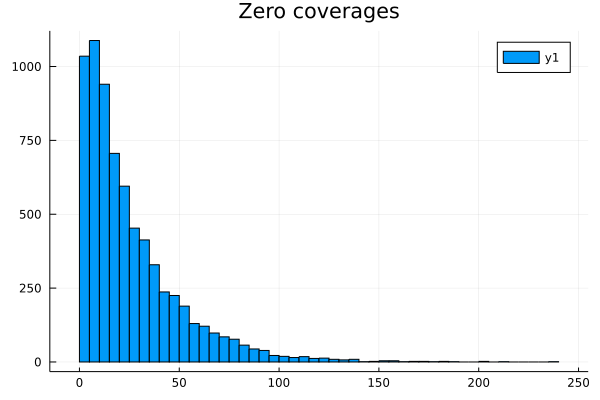

In [57]:
histogram(h[0],title="Zero coverages")

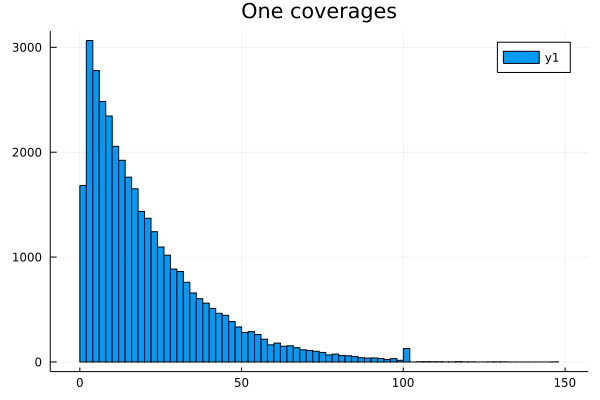

In [58]:
histogram(h[1],title="One coverages")

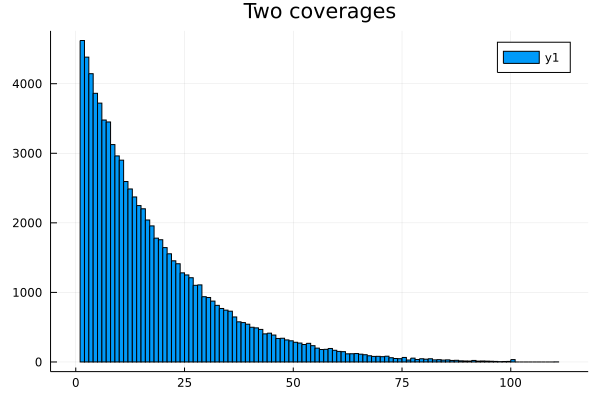

In [61]:
histogram(h[2],title="Two coverages")

In [46]:
h0=fill(0.0,maximum(h[0]))
for i in h[0]
    h0[i]+=1
end
h1=fill(0.0,maximum(h[1]))
for i in h[1]
    h1[i]+=1
end
h2=fill(0.0,maximum(h[2]))
for i in h[2]
    h2[i]+=1
end

In [49]:
x0=Float64[i for i in 1:maximum(h[0])]
x1=Float64[i for i in 1:maximum(h[1])]
x2=Float64[i for i in 1:maximum(h[2])]
print("")

In [62]:
fit0=curve_fit(LinearFit,log.(x0),h0)
y0=fit0.(log.(x0))
fit1=curve_fit(LinearFit,log.(x1),h1)
y1=fit1.(log.(x1))
fit2=curve_fit(LinearFit,log.(x2),h2)
y2=fit2.(log.(x2))
print("")

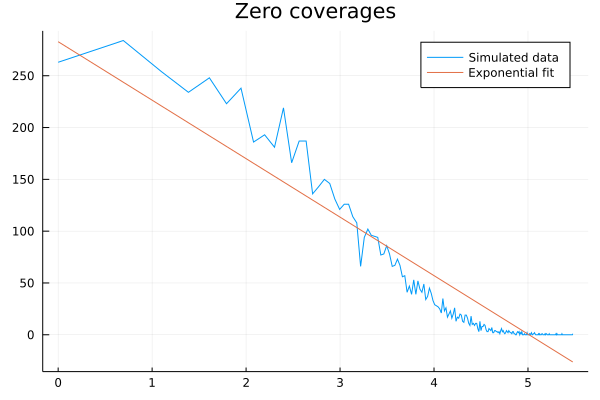

In [63]:
plot(log.(x0),h0,label="Simulated data")
plot!(log.(x0),y0,label="Exponential fit")
title!("Zero coverages")

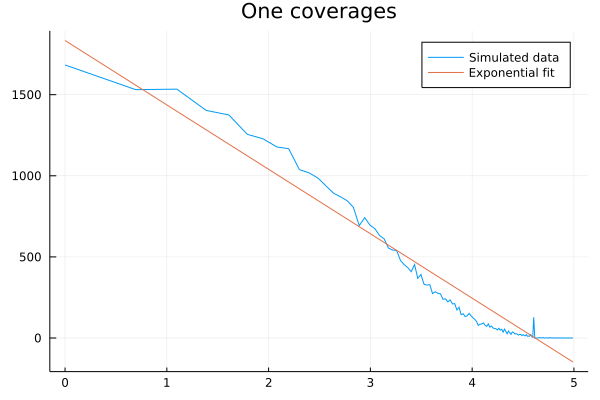

In [64]:
plot(log.(x1),h1,label="Simulated data")
plot!(log.(x1),y1,label="Exponential fit")
title!("One coverages")

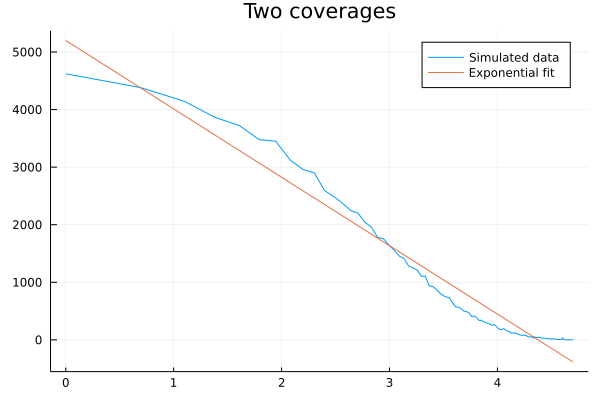

In [65]:
plot(log.(x2),h2,label="Simulated data")
plot!(log.(x2),y2,label="Exponential fit")
title!("Two coverages")